Imports and NLTK Data Download

In [37]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer as Sia

# Download required NLTK data
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hello\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Define scrapper_names Function

In [38]:
# Scrape airline names from the website
def scrapper_names():
    url = 'https://www.airlinequality.com/review-pages/a-z-airline-reviews/'
    response = requests.get(url)
    airlines_names = []
    soup = BeautifulSoup(response.content, 'html.parser')
    for row in soup.find_all('ul', class_='items'):
        for i in row.find_all('li'):  # Extract only airline names, ignoring review counts
            airlines_names.append(i.get_text().strip())
    return airlines_names

Define airlines Function

In [39]:

# Create a DataFrame from airline names
def airlines(airlines_names):
    df = pd.DataFrame(airlines_names, columns=['Airline'])
    return df


Define input_airline Function

In [40]:
# Input and validate airline name
def input_airline(airline_list):
    actual_airline = input("Enter the name of the airline you want to search for: ").lower()
    if actual_airline in airline_list:
        print("Processing...")
        print(f"The {actual_airline} airline is in the list")
        return actual_airline
    else:
        print(f"The {actual_airline} airline is not in the list")
        return None

Define scrapper_reviews Function

In [41]:
# Scrape reviews for the specified airline
def scrapper_reviews(actual_airline):
    if not actual_airline:
        return None
    url = f"https://www.airlinequality.com/airline-reviews/{actual_airline.replace(' ', '-')}"
    base_url = url
    pages = 5
    page_size = 100
    reviews = []

    for i in range(1, pages + 1):
        print(f"Scraping page {i}")
        url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
        response = requests.get(url)
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')
        for para in parsed_content.find_all("div", {"class": "text_content"}):
            reviews.append(para.get_text().strip())
        print(f"   ---> {len(reviews)} total reviews")
    
    df = pd.DataFrame(reviews, columns=['Reviews'])
    # Handle splitting only if '|' exists in reviews 
    df['reviews'] = df['Reviews'].apply(lambda x: x.split('|')[1] if '|' in x else x)
    return df

Define vader Function

In [42]:
# Perform sentiment analysis using VADER
def vader(df):
    if df is None or df.empty:
        print("No reviews to analyze.")
        return None
    sia = Sia()
    df["sentiments"] = ''
    df["Vader_Analysis"] = ''
    
    for i in range(len(df)):
        df.loc[i, "sentiments"] = sia.polarity_scores(df["reviews"][i])["compound"]
        if df["sentiments"][i] >= 0.05:
            df.loc[i, "Vader_Analysis"] = "Positive"
        elif df["sentiments"][i] <= -0.05:
            df.loc[i, "Vader_Analysis"] = "Negative"
        else:
            df.loc[i, "Vader_Analysis"] = "Neutral"
    return df

Define plotter Function

In [43]:
# Plot sentiment analysis results
def plotter(df):
    if df is None or df.empty:
        print("No data to plot.")
        return
    plt.figure(figsize=(10, 5))
    plt.title("Sentiment Analysis By Vader Analysis")
    plt.xlabel("Sentiments")
    plt.ylabel("Counts")
    df["Vader_Analysis"].value_counts().plot(kind="pie")
    plt.show()
    df["Vader_Analysis"].value_counts().plot(kind="bar")
    plt.show()

Define main Function

In [ ]:
# Main function to orchestrate the workflow
def main():
    z = scrapper_names()
    str_1 = input("Enter the first 2 or more characters of the airline name: ").lower()
    airline = [i.lower() for i in z if i.lower().startswith(str_1)]
    
    if airline:
        print("Matching airlines:")
        for i in airline:
            print(i)
    else:
        print("No airlines found with those characters.")
        return
    
    actual_input = input_airline(airline)
    reviews = scrapper_reviews(actual_input)
    analyzed_reviews = vader(reviews)
    plotter(analyzed_reviews)
    \
    print("Done.")

Execute the Script

Matching airlines:
zambia airways
Processing...
The zambia airways airline is in the list
Scraping page 1
   ---> 2 total reviews
Scraping page 2
   ---> 2 total reviews
Scraping page 3
   ---> 2 total reviews
Scraping page 4
   ---> 2 total reviews
Scraping page 5
   ---> 2 total reviews


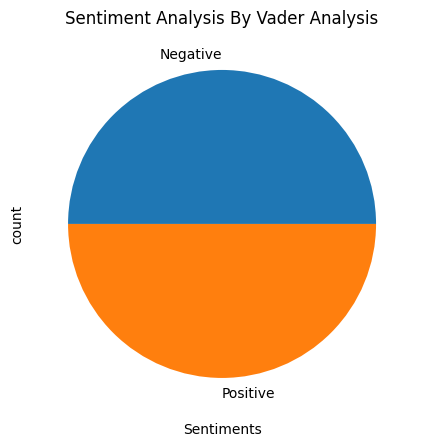

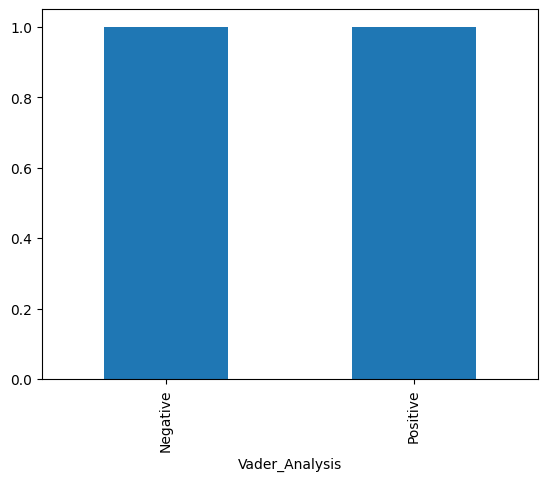

                                             Reviews  \
0  ✅ Trip Verified |   The worst experience ever....   
1  ✅ Trip Verified |  Flew Lusaka to Ndola via So...   

                                             reviews sentiments Vader_Analysis  
0     The worst experience ever. 7am departure th...    -0.9601       Negative  
1    Flew Lusaka to Ndola via Solwezi 11 Sept. 22...     0.9528       Positive  
Done.


In [46]:
# Run the main function
main()